# Modelos implementados para el sistema de clasificación de paciente en un centro geriátrico

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Modelo con aprendizaje no supervisado

##Carga y procesamiento de los datos

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


,Edad,Género,Test de Tinetti - JUNIO 2019,Grado_de_dependencia,Grupo al que pertenece,Deficiencia_Visual
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,81.900000,0.750000,21.350000,18.000000,1.65000,0.675000
std,7.475773,0.438529,7.751096,7.578647,1.12204,0.474342
min,69.000000,0.000000,1.000000,10.000000,0.00000,0.000000
25%,76.000000,0.750000,16.000000,10.000000,1.00000,0.000000
50%,81.000000,1.000000,20.500000,20.000000,2.00000,1.000000
75%,87.250000,1.000000,27.500000,20.000000,3.00000,1.000000
max,105.000000,1.000000,33.000000,40.000000,3.00000,1.000000


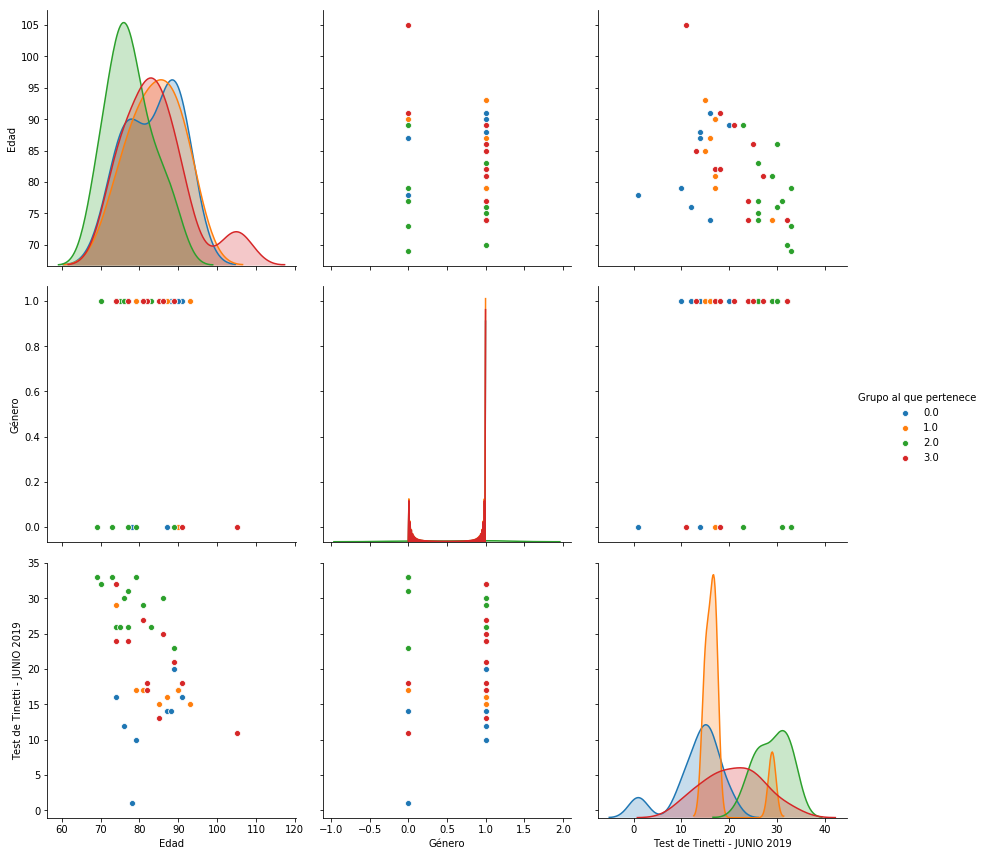

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
#datos u originales para interpolar
#datos u originales
dataframe = pd.read_excel(r"/content/drive/My Drive/TFM/TFM/datos u originales para interpolar.xlsx")
dataframe.columns = ['Apellidos','Nombres','Cedula','Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Grupo al que pertenece','Deficiencia_Visual']
dataframe.drop(['Apellidos','Nombres','Cedula'], axis='columns', inplace=True)

dataframe.Género=dataframe.Género.replace({"Femenino": 1,"Masculino": 0})
dataframe.Deficiencia_Visual=dataframe.Deficiencia_Visual.replace({"SI": 1,"NO": 0})
dataframe.Grado_de_dependencia=dataframe.Grado_de_dependencia.replace({"Dependencia Leve": 20, "Dependencia Moderada": 30, "Dependencia Severa": 40, "Independiente": 10})
dataframe.to_csv('/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv',encoding="utf-8", index=False)
sb.pairplot(dataframe, hue='Grupo al que pertenece',size=4,vars=['Edad','Género','Test de Tinetti - JUNIO 2019'],kind='scatter')
display(dataframe.describe())


##Visualización de los datos

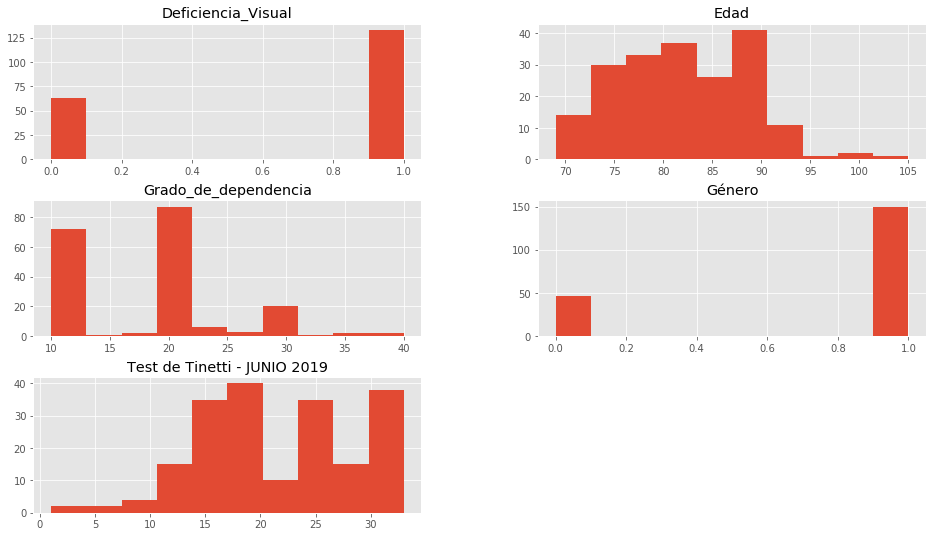

,Edad,Género,Test de Tinetti - JUNIO 2019,Grado_de_dependencia,Deficiencia_Visual
count,196.000000,196.000000,196.000000,196.000000,196.000000
mean,81.969388,0.765306,21.438776,17.857143,0.678571
std,6.460061,0.424893,7.352050,7.052914,0.468221
min,69.000000,0.000000,1.000000,10.000000,0.000000
25%,77.000000,1.000000,16.000000,10.000000,0.000000
50%,81.000000,1.000000,20.500000,20.000000,1.000000
75%,87.000000,1.000000,27.250000,20.000000,1.000000
max,105.000000,1.000000,33.000000,40.000000,1.000000


,Grupo al que pertenece
count,196.000000
mean,1.663265
std,0.954814
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [0]:
import matplotlib.pyplot as plt
data_x = pd.read_csv(r"/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv")
data_x.columns = ['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Grupo al que pertenece','Deficiencia_Visual']
data_x.drop(['Grupo al que pertenece'], axis='columns', inplace=True)
#data_x.drop(['Grupo al que pertenece','Grado_de_dependencia'], axis='columns', inplace=True)
#data.to_csv('/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv',encoding="utf-8", index=False)
data_y = pd.read_csv(r"/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv")
data_y.columns = ['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Grupo al que pertenece','Deficiencia_Visual']
data_y.drop(['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Deficiencia_Visual'], axis='columns', inplace=True)
#data_y.drop(['Edad','Género','Test de Tinetti - JUNIO 2019','Grupo al que pertenece','Deficiencia_Visual'], axis='columns', inplace=True)

#data_x=pd.get_dummies(data_x, prefix=['Género', 'Grado de dependencia','Deficiencia_Visual'])




data_x=data_x.interpolate(method='piecewise_polynomial')
data_x=data_x.round(0)
data_y=data_y.interpolate(method='piecewise_polynomial')
data_y=data_y.round(0)

data_x.hist()
plt.show()
display(data_x.describe())
display(data_y.describe())




#data_y = data_y.drop(data_y[data_y['Grupo al que pertenece']>40].index)

#indices = data_y[data_y['Grupo al que pertenece']>4].index.item()
#indices0 = data_y[data_y['Grupo al que pertenece']==0].index.item()

#indices=np.where(data_y['Grupo al que pertenece']>4)[0]
#indices0=np.where(data_y['Grupo al que pertenece']==0)[0]

#display(indices)
#display(indices0)
#data_y=data_y.drop(indices,axis=0)
#data_x=data_x.drop(indices,axis=0)
#data_y=data_y.drop(indices0,axis=0)
#data_x=data_x.drop(indices0,axis=0)
    

#display(data_x)
#display(data_y)
x,y=np.shape(data_x)
training_x, test_x = data_x[:int(x*0.9)], data_x[int(x*0.9):]
training_y, test_y = data_y[:int(x*0.9)], data_y[int(x*0.9):]
#display(training_x)
#display(test_x)
#display(training_y)
#display(test_y)
#sb.pairplot(data_x, hue='Grado_de_dependencia',size=4,vars=['Edad','Género','Test de Tinetti - JUNIO 2019'],kind='scatter')

In [0]:

import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

In [0]:
#dataframe = pd.read_csv(r"/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv")
#dataframe.head()
#dataframe.describe()
display(test_x.describe())
display(training_x.describe())
#display(test_x)


,Edad,Género,Test de Tinetti - JUNIO 2019,Grado_de_dependencia,Deficiencia_Visual
count,4.000000,4.00000,4.000000,4.000000,4.00
mean,90.000000,0.50000,15.000000,25.000000,0.75
std,11.860298,0.57735,4.242641,5.773503,0.50
min,76.000000,0.00000,11.000000,20.000000,0.00
25%,85.750000,0.00000,11.750000,20.000000,0.75
50%,89.500000,0.50000,14.500000,25.000000,1.00
75%,93.750000,1.00000,17.750000,30.000000,1.00
max,105.000000,1.00000,20.000000,30.000000,1.00


,Edad,Género,Test de Tinetti - JUNIO 2019,Grado_de_dependencia,Deficiencia_Visual
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,81.000000,0.777778,22.055556,17.222222,0.666667
std,6.471917,0.421637,7.764183,7.410846,0.478091
min,69.000000,0.000000,1.000000,10.000000,0.000000
25%,75.750000,1.000000,16.000000,10.000000,0.000000
50%,81.000000,1.000000,23.500000,20.000000,1.000000
75%,86.250000,1.000000,29.000000,20.000000,1.000000
max,93.000000,1.000000,33.000000,40.000000,1.000000


In [0]:
display(test_y.describe())
display(training_y.describe())
#display(test_y)

,Grupo al que pertenece
count,20.000000
mean,2.100000
std,0.307794
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


,Grupo al que pertenece
count,176.000000
mean,1.613636
std,0.990605
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


##Métodos para la elección del número idóneo de clusters

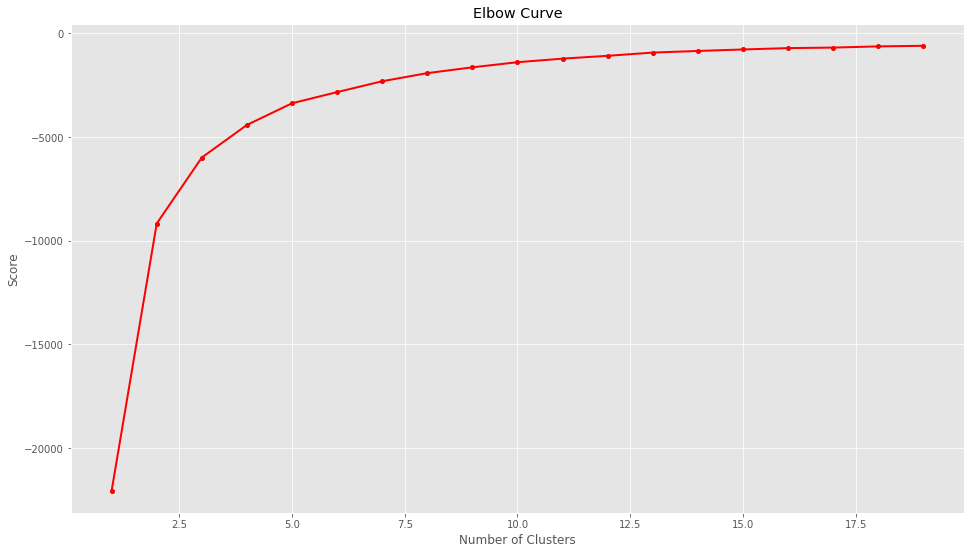

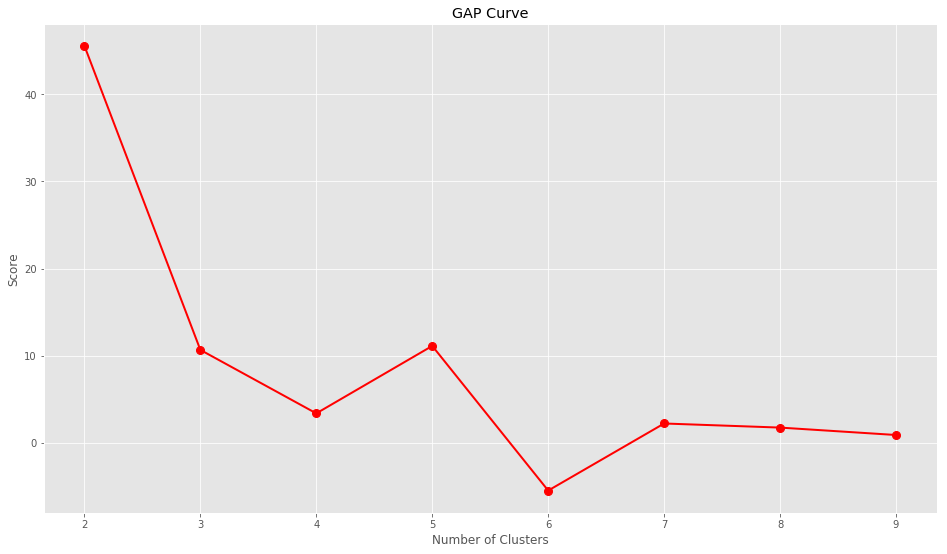

In [0]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(training_x).score(training_x) for i in range(len(kmeans))]
plt.plot(Nc,score,'ro-', markersize=4, lw=2)
#plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate distances between points or groups of points
Z = linkage(training_x, metric='euclidean', method='ward')

# Obtain the last 10 distances between points
last = Z[-10:, 2]
num_clustres = np.arange(1, len(last) + 1)

# Calculate Gap
gap = np.diff(last, n=2)  # second derivative
plt.plot(num_clustres[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('GAP Curve')
plt.show()



In [0]:
import plotly.figure_factory as ff

import numpy as np

fig = ff.create_dendrogram(training_x)
fig.update_layout(width=800, height=800)
fig.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5292493478153647
For n_clusters = 3 The average silhouette_score is : 0.5085480924974869
For n_clusters = 4 The average silhouette_score is : 0.4764504679356972


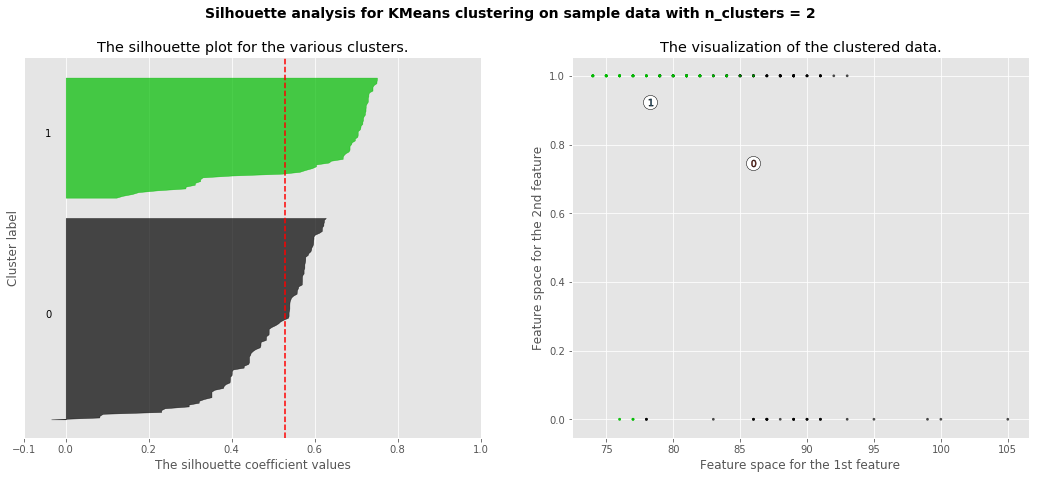

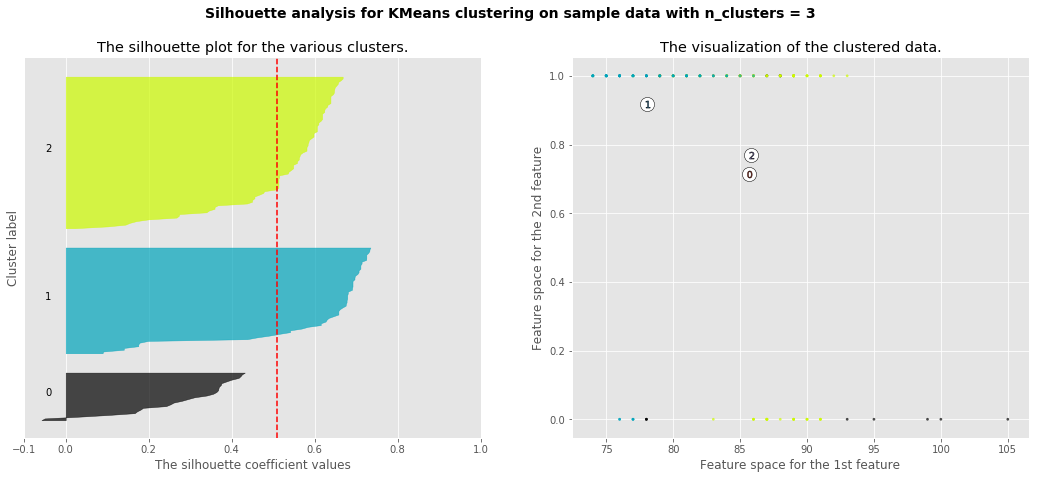

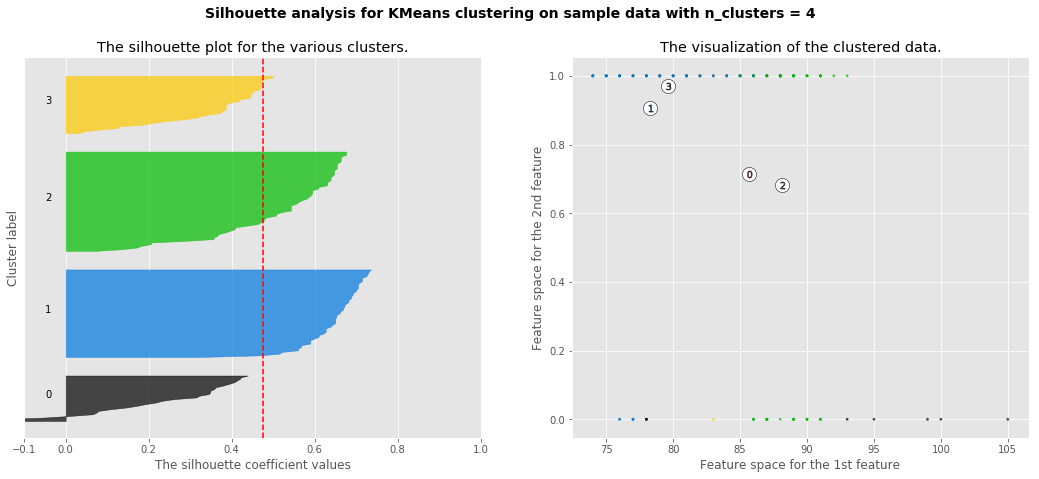

In [0]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500,
 #                 n_features=2,
  #                centers=4,
   #               cluster_std=1,
    #              center_box=(-10.0, 10.0),
     #             shuffle=True,
      #            random_state=1)  # For reproducibility
#training_x, test_x = data_x[:int(x*0.9)], data_x[int(x*0.9):]
X=training_x.values

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráficas de silueta para varios clusters.")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Número de clusters")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizació de la data de los clusters.")
    ax2.set_xlabel(" 1st feature")
    ax2.set_ylabel(" 2nd feature")

    plt.suptitle(("Análisis de silueta para n cluesters de los datos utilizados"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

##Implementanción y evaluación del algoritmo k-means

In [0]:
kmeans = KMeans(n_clusters=4).fit(training_x)
centroids = kmeans.cluster_centers_
print(centroids)

[[85.64285714  0.71428571 10.82142857 30.42857143  0.82142857]
 [78.26415094  0.90566038 28.22641509 10.11320755  0.56603774]
 [79.62857143  0.97142857 19.97142857 19.82857143  0.74285714]
 [88.13333333  0.68333333 17.51666667 20.3         0.81666667]]


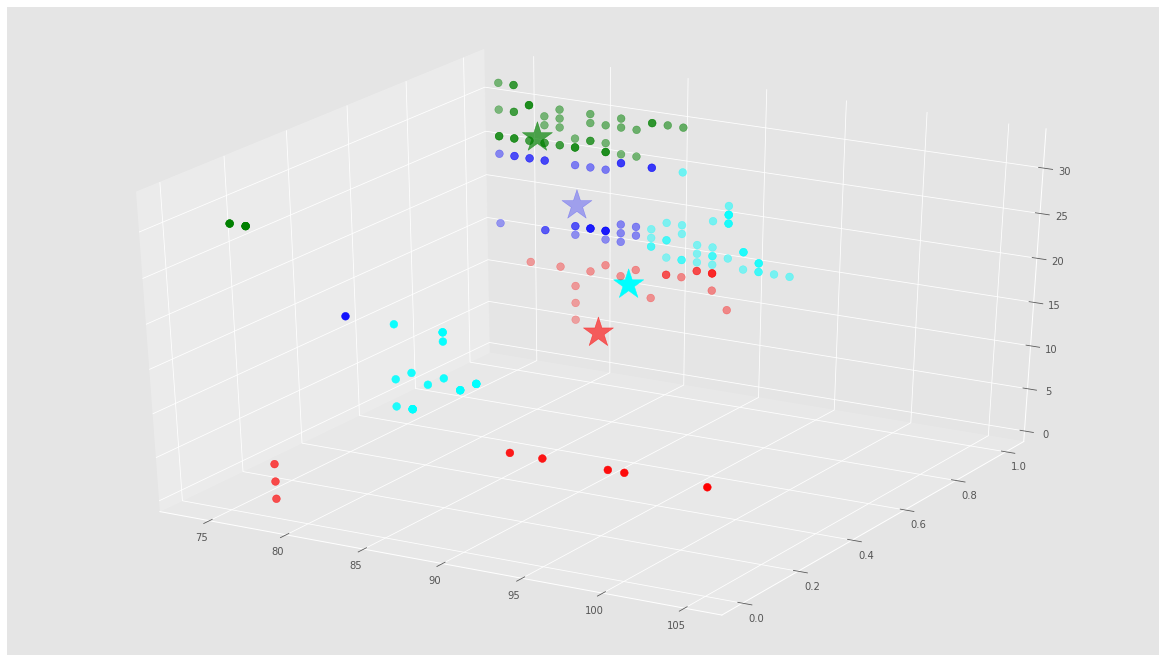

In [0]:
training_x=np.array(training_x)
#training_x=training_x.values
# Predicting the clusters
labels = kmeans.predict(training_x)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_x[:, 0], training_x[:, 1], training_x[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [0]:
copy =  pd.DataFrame()
#copy['idCara']=dataframe['idCara'].values
#copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,28
1,green,53
2,blue,35
3,cyan,60


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
X_new = test_x.values
#display(X_new)
new_labels = kmeans.predict(X_new)
#print("Predcciones: "+str(new_labels))

#print("Valores centro: "+str(test_y))
display("Matriz de confusión: ")
display(confusion_matrix ( test_y ,  new_labels))
#display("Accuracy:    "+str(accuracy_score(test_y, new_labels)))
print(classification_report(test_y, new_labels))


'Matriz de confusión: '

array([[ 0,  0,  0],
       [18,  0,  0],
       [ 2,  0,  0]])

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       0.0
         2.0       0.00      0.00      0.00      18.0
         3.0       0.00      0.00      0.00       2.0

    accuracy                           0.00      20.0
   macro avg       0.00      0.00      0.00      20.0
weighted avg       0.00      0.00      0.00      20.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



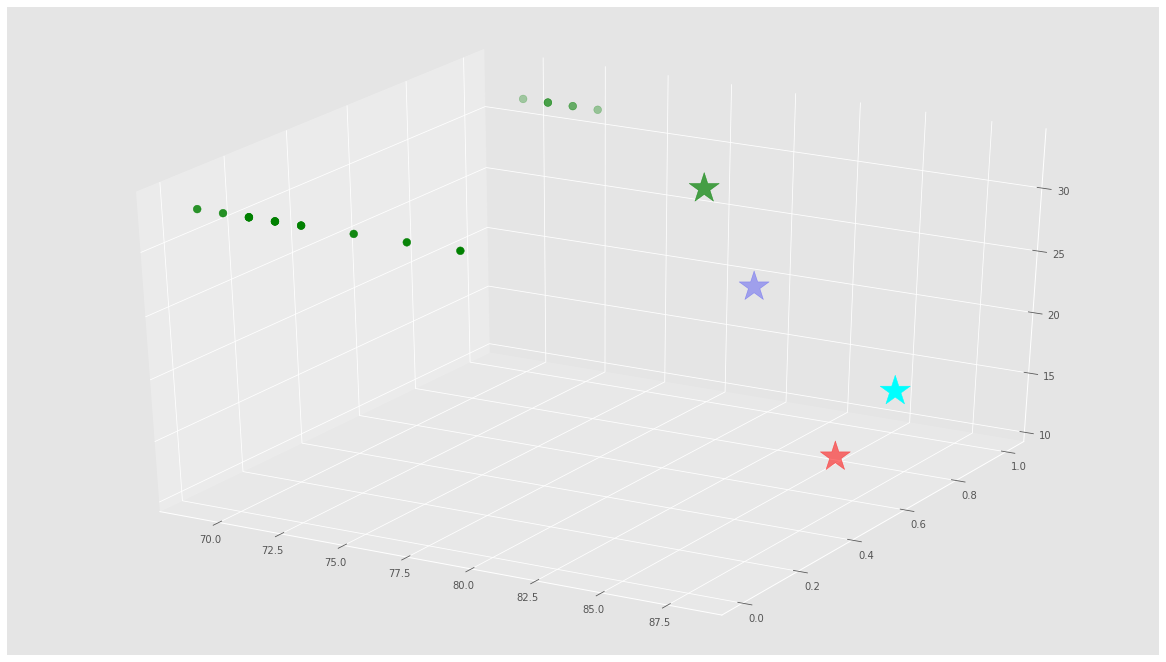

In [0]:
#training_x=np.array(training_x.values)
#X_new=X_new.values
# Predicting the clusters
labels = kmeans.predict(X_new)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [0]:
copy =  pd.DataFrame()
#copy['idCara']=dataframe['idCara'].values
#copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,NaN
1,green,20.0
2,blue,NaN
3,cyan,NaN


In [0]:
    """from sklearn.metrics import pairwise_distances_argmin_min
    from sklearn import metrics

    prediccion=kmeans.predict(X_new)
    #Puntuación de silueta: un valor cercano a +1 indica que la muestra está lejos de los grupos vecinos. Un valor de 0 indica que la muestra está en o muy cerca del límite de decisión entre dos grupos vecinos y los valores negativos indican que esas muestras podrían haber sido asignadas al grupo incorrecto
    score = metrics.silhouette_score(X_new, prediccion)
    print("Score")
    display(score)
    scores = metrics.silhouette_samples(X_new, prediccion)
    sb.distplot(scores)

ValueError: ignored

#Modelo con aprendizaje supervisado

##Carga y procesamiento de los datos

In [0]:

data_x = pd.read_csv(r"/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv")
data_x.columns = ['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Grupo al que pertenece','Deficiencia_Visual']
data_x.drop(['Grupo al que pertenece'], axis='columns', inplace=True)
#data.to_csv('/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv',encoding="utf-8", index=False)
data_y = pd.read_csv(r"/content/drive/My Drive/TFM/TFM/DatosGeriatrico.csv")
data_y.columns = ['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Grupo al que pertenece','Deficiencia_Visual']
data_y.drop(['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Deficiencia_Visual'], axis='columns', inplace=True)

#data_x=pd.get_dummies(data_x, prefix=['Género', 'Grado_de_dependencia','Deficiencia_Visual'])

#display(data_x)
#display(data_y)

#training_x, test_x = data_x[:35], data_x[35:]
#training_y, test_y = data_y[:35], data_y[35:]

data_x=data_x.interpolate(method='piecewise_polynomial')
data_x=data_x.round(0)
data_y=data_y.interpolate(method='piecewise_polynomial')
data_y=data_y.round(0)

#display(data_x)
#display(data_y)
scaler = MinMaxScaler()
data_x[['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Deficiencia_Visual']] = scaler.fit_transform(data_x[	['Edad','Género','Test de Tinetti - JUNIO 2019','Grado_de_dependencia','Deficiencia_Visual']])


#data_y = data_y.drop(data_y[data_y['Grupo al que pertenece']>4].index)

#indices = data_y[data_y['Grupo al que pertenece']>4].index.item()
#indices0 = data_y[data_y['Grupo al que pertenece']==0].index.item()

#indices=np.where(data_y['Grupo al que pertenece']>4)[0]
#indices=np.where(data_y['Grupo al que pertenece']==0)[0]
#display(indices)
#display(indices0)
#data_y=data_y.drop(indices,axis=0)
#data_x=data_x.drop(indices,axis=0)
#data_y=data_y.drop(indices0,axis=0)
#data_x=data_x.drop(indices0,axis=0)
    

#training_x= data_x
#training_y= data_y
#data_y=data_y/4
#display(data_y)



#display(dataframe)

#display(data_x)
#display(data_y)
x,y=np.shape(data_x)
training_x, test_x = data_x[:int(x*0.7)], data_x[int(x*0.7):]
training_y, test_y = data_y[:int(x*0.7)], data_y[int(x*0.7):]





#training_x, test_x = data_x[:35], data_x[35:]
#training_y, test_y = data_y[:35], data_y[35:]


##Visualización de los datos

In [0]:

display(training_x.head())
display(training_x.describe())

display(training_y.head())
display(training_y.describe())

,Edad,Género,Test de Tinetti - JUNIO 2019,Grado_de_dependencia,Deficiencia_Visual
0,0.250000,0.0,0.00000,1.000000,1.0
1,0.250000,0.0,0.06250,0.933333,1.0
2,0.250000,0.0,0.12500,0.866667,1.0
3,0.277778,1.0,0.15625,0.800000,0.0
4,0.277778,1.0,0.21875,0.733333,0.0


,Edad,Género,Test de Tinetti - JUNIO 2019,Grado_de_dependencia,Deficiencia_Visual
count,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.430251,0.795620,0.520073,0.374696,0.781022
std,0.155652,0.404727,0.162412,0.191508,0.415071
min,0.138889,0.000000,0.000000,0.000000,0.000000
25%,0.305556,1.000000,0.437500,0.333333,1.000000
50%,0.444444,1.000000,0.500000,0.333333,1.000000
75%,0.555556,1.000000,0.656250,0.333333,1.000000
max,1.000000,1.000000,0.781250,1.000000,1.000000


,Grupo al que pertenece
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,Grupo al que pertenece
count,137.000000
mean,1.481752
std,1.050925
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


##Implementación de la red neuronal

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

training_x = training_x.astype('float32')
training_y = training_y.astype('float32')
#Creo el modelo de la red neuronal
model = Sequential()
#Creo la primera capa oculta con 5 neuronas y función de activacion relu
model.add(Dense(5, kernel_initializer='normal',activation='relu',input_shape=(5,)))
#Creo la segunda capa oculta con 32 neuronas y función de activacion relu
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
model.add(Dense(32, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu',kernel_initializer='normal'))
#model.add(Dense(256, activation='relu',kernel_initializer='normal'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
#Creo la capa de salida con 4 neuronas, debido a las 4 posibles salidas que tiene que reconocer la red, la funcion es de tipo softmax
model.add(Dense(4, activation='softmax',kernel_initializer='normal'))
#Muestro un resumen de la red, loss y accuracy en cada epoca
model.summary()

#compilo el modelo
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_26 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)               

In [0]:
#entreno el modelo

display(np.shape(training_x))
display(np.shape(training_y))
modeloentrenado=model.fit(training_x,training_y, epochs=550, batch_size=16,validation_split=0.2)

(137, 5)

(137, 1)

Train on 109 samples, validate on 28 samples
Epoch 1/550
109/109 [==============================] - 1s 8ms/step - loss: 1.3855 - acc: 0.3394 - val_loss: 1.3926 - val_acc: 0.0000e+00
Epoch 2/550
109/109 [==============================] - 0s 178us/step - loss: 1.3824 - acc: 0.3853 - val_loss: 1.4036 - val_acc: 0.0000e+00
Epoch 3/550
109/109 [==============================] - 0s 187us/step - loss: 1.3774 - acc: 0.3853 - val_loss: 1.4183 - val_acc: 0.0000e+00
Epoch 4/550
109/109 [==============================] - 0s 190us/step - loss: 1.3724 - acc: 0.3853 - val_loss: 1.4405 - val_acc: 0.0000e+00
Epoch 5/550
109/109 [==============================] - 0s 197us/step - loss: 1.3633 - acc: 0.3853 - val_loss: 1.4715 - val_acc: 0.0000e+00
Epoch 6/550
109/109 [==============================] - 0s 197us/step - loss: 1.3514 - acc: 0.3853 - val_loss: 1.5149 - val_acc: 0.0000e+00
Epoch 7/550
109/109 [==============================] - 0s 200us/step - loss: 1.3386 - acc: 0.3853 - val_loss: 1.5854 - val_

##Evalúo el modelo

In [0]:
test_loss, test_acc = model.evaluate(training_x, training_y)
print('Accuracy:', test_acc)

137/137 [==============================] - 0s 61us/step
Accuracy: 0.49635036496350365


In [0]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
fil, col =np.shape(test_y)
prediccion=model.predict(test_x)
#display(prediccion)
prediccion=np.array(prediccion)
maximos=np.zeros((fil,col))
for i in range(fil):
  maximos[i]=np.argmax(prediccion[i,:])
#maximos[1]=np.argmax(prediccion[1,:])
#maximos[2]=np.argmax(prediccion[2,:])
#maximos[3]=np.argmax(prediccion[3,:])
#maximos[4]=np.argmax(prediccion[4,:])
#maximos[5]=np.argmax(prediccion[5,:])
#maximos[6]=np.argmax(prediccion[6,:])
#maximos[7]=np.argmax(prediccion[7,:])
#maximos[8]=np.argmax(prediccion[8,:])
#maximos[9]=np.argmax(prediccion[9,:])
#maximos[10]=np.argmax(prediccion[10,:])
#maximos[11]=np.argmax(prediccion[11,:])


display("Matriz de confusión:   ")

display(confusion_matrix ( test_y ,  maximos))
#display("accuracy"+str(accuracy_score(test_y, maximos)))
print(classification_report(test_y, maximos))
#display(test_y)
#display(maximos)
#display(model.test_on_batch(test_x, test_y))
#display(model.predict_on_batch(test_x))

'Matriz de confusión:   '

array([[ 0,  4,  0],
       [ 0, 46,  0],
       [ 0,  9,  0]])

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.78      1.00      0.88        46
         3.0       0.00      0.00      0.00         9

    accuracy                           0.78        59
   macro avg       0.26      0.33      0.29        59
weighted avg       0.61      0.78      0.68        59



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


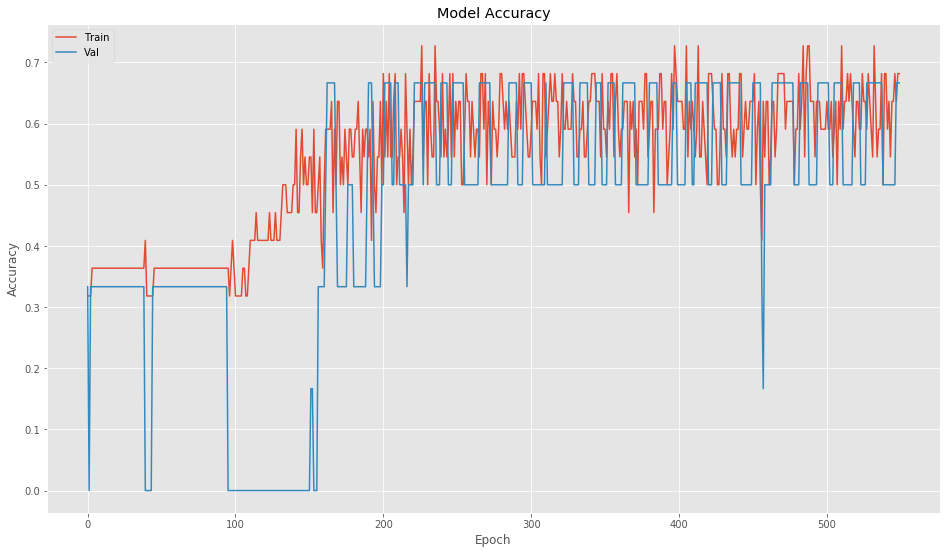

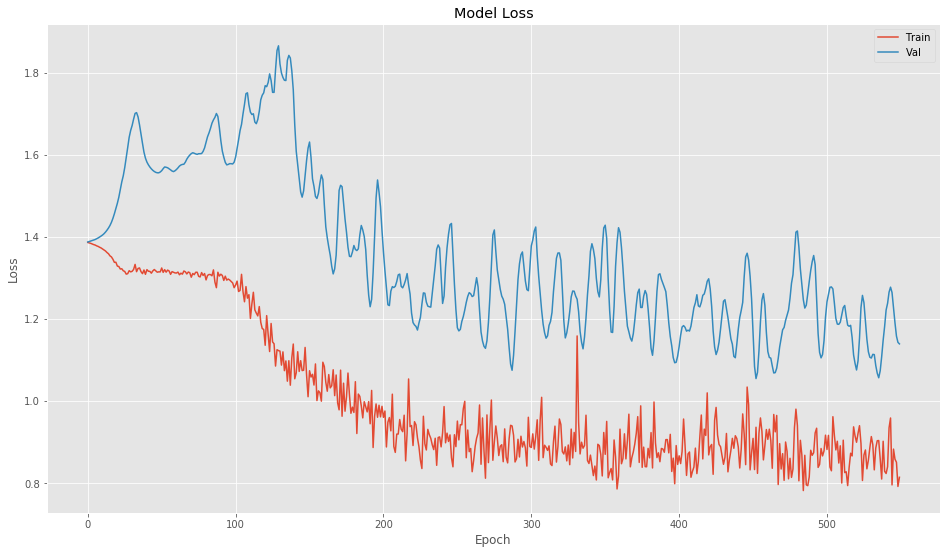

In [0]:
plot_acc(modeloentrenado, title="Model Accuracy")
plot_loss(modeloentrenado, title="Model Loss")